In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pickle

In [6]:
df = pd.read_csv('Airline-Tags.csv', encoding='latin1')
df

,_unit_id,_last_judgment_at,airline_sentiment,Tag,airline,Text,tweet_created,tweet_id
0,681448150,2/25/15 5:24,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.,2/24/15 11:35,5.700000e+17
1,681448153,2/25/15 1:53,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials t...,2/24/15 11:15,5.700000e+17
2,681448156,2/25/15 10:01,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2/24/15 11:15,5.700000e+17
3,681448158,2/25/15 3:05,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,2/24/15 11:15,5.700000e+17
4,681448159,2/25/15 5:50,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,2/24/15 11:14,5.700000e+17
5,681448162,2/25/15 9:10,negative,Can't Tell,Virgin America,@VirginAmerica seriously would pay $30 a fligh...,2/24/15 11:14,5.700000e+17
6,681448165,2/25/15 8:11,positive,NaN,Virgin America,"@VirginAmerica yes, nearly every time I fly VX...",2/24/15 11:13,5.700000e+17
7,681448167,2/25/15 2:11,neutral,NaN,Virgin America,@VirginAmerica Really missed a prime opportuni...,2/24/15 11:12,5.700000e+17
8,681448169,2/25/15 9:01,positive,NaN,Virgin America,"@virginamerica Well, I didn't_Ñ_but NOW I DO! :-D",2/24/15 11:11,5.700000e+17
9,681448171,2/25/15 4:15,positive,NaN,Virgin America,"@VirginAmerica it was amazing, and arrived an ...",2/24/15 10:53,5.700000e+17


In [7]:
df = df[['Tag', 'Text']]
df.head()

,Tag,Text
0,NaN,@VirginAmerica What @dhepburn said.
1,NaN,@VirginAmerica plus you've added commercials t...
2,NaN,@VirginAmerica I didn't today... Must mean I n...
3,Bad Flight,@VirginAmerica it's really aggressive to blast...
4,Can't Tell,@VirginAmerica and it's a really big bad thing...


In [8]:
# drop all unlabeled instances
df = df[df.Tag.notnull()]
len(df)

9178

In [123]:
df.Tag.value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: Tag, dtype: int64

# Data Preprocessing

I first dropped all un-labeled text instances for the sake of time. Text data scraped from the web is inherently messy including emoticons, different types of puncuation, capital letters, etc. I created a text processing function that removes punction, special characters, and converts to all lowercase. Before that processing steps occurred - I first made the suggested cleaning steps in converting the twitter handle to 'toperson' and any link in the text to 'link'. I wanted to also make the change for city names but couldn't think of an efficient way to make a search for cities that did not include hard coding a list of cities - initially I wanted to incorporate the geograpy module but it's backend is not compatible with python 3.

In [4]:
import re

def preprocessor(text):
    text = re.sub('(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9]+)', 'toperson', text)
    text = re.sub('(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', 'link', text)
    
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

In [9]:
# Cleaned Text

df['Text'] = df['Text'].apply(preprocessor)
df

,Tag,Text
3,Bad Flight,toperson it s really aggressive to blast obnox...
4,Can't Tell,toperson and it s a really big bad thing about it
5,Can't Tell,toperson seriously would pay 30 a flight for s...
15,Late Flight,toperson sfo pdx schedule is still mia
17,Bad Flight,toperson i flew from nyc to sfo last week and ...
20,Can't Tell,toperson why are your first fares in may over ...
24,Customer Service Issue,toperson you guys messed up my seating i reser...
25,Customer Service Issue,toperson status match program i applied and it...
26,Can't Tell,toperson what happened 2 ur vegan food options...
28,Bad Flight,toperson amazing to me that we can t get any c...


# Binary Classification

In [10]:
# Change Tags to Late Flight vs. Not

def late_flight_encoder(x):
    if x['Tag'] == 'Late Flight':
        x['Late Flight'] = 1
    else:
        x['Late Flight'] = 0
    return x

In [11]:
df1 = df.apply(late_flight_encoder, axis=1)

In [10]:
df1['Late Flight'].value_counts()

0    7513
1    1665
Name: Late Flight, dtype: int64

In [11]:
len(df1[df1['Late Flight'] == 1]) / len(df)

0.18141207234691653

# Class Imbalance

Like most real-world classification problems there is pretty steep class imbalance which we will keep in mind when evaluating the models. When splitting the train and test set in the training phase it's also important to keep the imbalance constant between the train and test set - we can do this by using the stratify parameter in scikit-learn's train_test_split function.

In [16]:
# Split into test and train

from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(df1['Text'].values, df1['Late Flight'].values,
                                                                   test_size=0.5, random_state=0, 
                                                                    stratify=df1['Late Flight'].values)

# Feature Extraction

## Term Frequency Inverse Document Frequency

In natural language processing, common words that appear multiple times in different text samples such as 'the' or 'is' are not useful especially in the context of sentiment analysis where we aim to determine the review based off each word used in the review. To reduce the importance of common words and increase the importance of uncommon words we can apply term frequency-inverse document frequency $$\text{idf} (t,d) = log\frac{1 + n_d}{1 + \text{df}(d, t)}$$.

## Tokenizing the Strings

We can use a stemming algorithm from the nltk library that takes a word and returns its stem so that variations of different stems are considered the same word. An example of this would be the words "consisting" and "consists" both having the stem "consist" and both being interpretted as their stem.

In [12]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

stop = stopwords.words('english')
porter = PorterStemmer()

def tokenizer(text):
    return text.split()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

# Modeling

## Multinomial Naive Bayes

The Multionmial Naive Bayes algorithm estimates the conditional probability of a particular word given a class as the relative frequency of term t in documents belonging to class(c). The variation takes into account the number of occurrences of term t in training documents from class (c),including multiple occurrences.

## Logistic Regression

One of the most commonly used statistical methods in binary classification. This model aims to create a separating boundary by first defining the output of a standard linear model as the log of the odds and then taking the inverse of the log of the odds function to then define the sigmoid function. The sigmoid function takes features parameterized by their weights and computes the probability with the sample being classified as 1 if the probability is greater than 0.5 and 0 if the probability is less than 0.5.


## Hyperparameter Tuning

I used a pipeline from scikit-learn that included count vector feature extraction and then the model (Naive Bayes or Logistic Regression). The count vectorizer parameters that were tune included the use of stopwords and the tokenizer function including stemming or not. 

For the naive bayes model the prior probability of the classes were tuned to either the class imbalance or not including a prior probability.

The logistic regression model tuned the type of regularization included, the strength of the regularization, and including a weight for the classes to counter the imbalance.

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)


param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'clf__class_prior': [[0.18, 0.82], None]},
             {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__class_prior': [[0.18, 0.82], None]}]

nb_tfidf = Pipeline([('vect', tfidf),
                     ('clf', MultinomialNB())])

gs_nb_tfidf = GridSearchCV(nb_tfidf, param_grid,
                           scoring='roc_auc',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

In [18]:
gs_nb_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   42.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'vect__ngram_range': [(1, 1)], 'clf__class_prior': [[0.18, 0.82], None], 'vect__stop_words': [['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'its...t__tokenizer': [<function tokenizer at 0x1a0adb4d90>, <function tokenizer_porter at 0x1a0c0451e0>]}],
       pre_dispatch='2*n_jobs', refit=True, return_tr

In [19]:
print('Best parameter set: %s ' % gs_nb_tfidf.best_params_)
print('ROC_AUC: %.3f' % gs_nb_tfidf.best_score_)

Best parameter set: {'vect__ngram_range': (1, 1), 'vect__norm': None, 'vect__use_idf': False, 'vect__tokenizer': <function tokenizer_porter at 0x1a0c0451e0>, 'vect__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

## Model Evaluation

The two performance metrics that I chose to evaluate the performance of our model are the confusion matrix and precision recall. These two are commonly used in classification problems.

In a confusion matrix each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class.

The recall (also the true positive rate) is the ratio of true positive guesses among all positives, the The precision is the ratio of the true positive guesses over all the positive guesses. Because precision and recall both provide valuable information about the quality of a classifier, we want to combine them into a single score. The F1 score is defined as the harmonic mean of recall and precision,

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

best_nb = gs_nb_tfidf.best_estimator_

predictions = best_nb.predict(X_test)
probabilities = best_nb.predict_proba(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[2983  774]
 [ 159  673]]
             precision    recall  f1-score   support

          0       0.95      0.79      0.86      3757
          1       0.47      0.81      0.59       832

avg / total       0.86      0.80      0.82      4589



In [21]:
# save model 

pickle.dump(best_nb, open('tfidf_nb.sav', 'wb'))

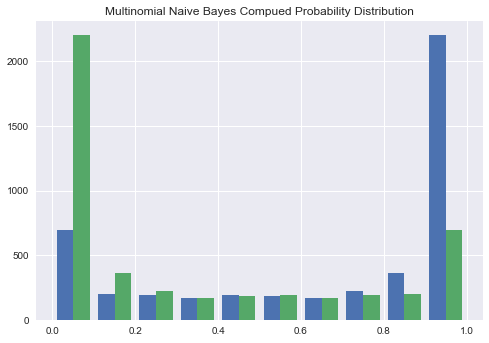

In [21]:
plt.hist(probabilities)
plt.title('Multinomial Naive Bayes Compued Probability Distribution')
plt.show()

In [102]:
from sklearn.linear_model import LogisticRegression

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0],
            'clf__class_weight': [{0:0.8, 1:0.2}, None]},
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0],
               'clf__class_weight': [{0:0.8, 1:0.2}, None]},
              ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='roc_auc',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

In [103]:
gs_lr_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  4.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...nalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'clf__class_weight': [{0: 0.8, 1: 0.2}, None], 'vect__ngram_range': [(1, 1)], 'vect__stop_words': [['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its',...nizer at 0x1a0cd69b70>, <function tokenizer_porter at 0x1a0c120840>], 'clf__C': [1.0, 10.0, 100.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_tr

In [104]:
print('Best parameter set: %s ' % gs_lr_tfidf.best_params_)
print('ROC AUC Score: %.3f' % gs_lr_tfidf.best_score_)

Best parameter set: {'vect__tokenizer': <function tokenizer_porter at 0x1a0c120840>, 'vect__ngram_range': (1, 1), 'vect__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some',

In [105]:
best_lr = gs_lr_tfidf.best_estimator_

predictions = best_lr.predict(X_test)
probabilities = best_lr.predict_proba(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3681   76]
 [ 423  409]]
             precision    recall  f1-score   support

          0       0.90      0.98      0.94      3757
          1       0.84      0.49      0.62       832

avg / total       0.89      0.89      0.88      4589



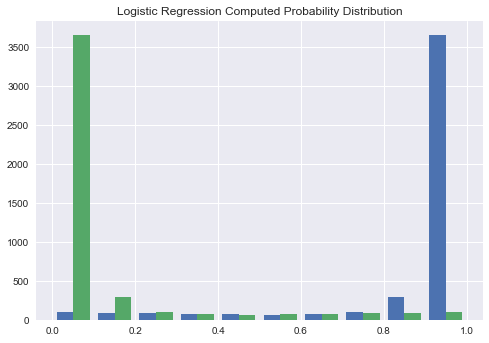

In [27]:
plt.hist(probabilities)
plt.title('Logistic Regression Computed Probability Distribution')
plt.show()

# Best model: Logistic Regression

The best performing model was a logistic regression model that used td-idf, tokenized using porter stemming, utilized stopwords, and incorporated the default l2 regularization. The F1 score outperformed the naive bayes model and had a much higher precision as opposed to a higher recall for the naive bayes model. In the context of this problem - recall could be more desirable depending on how risk-averse one is to late flights. If safety is the priority then the naive bayes model might be better, however if one really hates wasting time at airports and wants to spend the minimum time possible then the latter would be better. I chose to save the logistic regression model for the deployment of the deliverable .py file.

I also wanted to take a look at areas of prediction that the model struggled and quickly made a dataframe consisting of the text, tag, probablity of both classes, and the predicted label. I then narrowed it down to a dataframe that only had instances where the tag and predicted label disagreed.

In [107]:
# Save model

pickle.dump(best_lr, open('b_tfidf_lr.sav', 'wb'))

In [108]:
prob_df = pd.DataFrame(probabilities, columns=['Not Late Flight Prob', 'Late Flight Prob'])
prob_df['Predicted Label'] = predictions

test_df = pd.DataFrame(columns=['Text', 'Tag'])
test_df['Text'] = X_test
test_df['Tag'] = y_test

eval_df = test_df.join(prob_df)
eval_df.head(50)

,Text,Tag,Not Late Flight Prob,Late Flight Prob,Predicted Label
0,toperson i have been trying all week to book a...,0,0.982715,0.017285,0
1,toperson you keep returning my call and hangin...,0,0.966078,0.033922,0
2,toperson your service in philly is unacceptabl...,0,0.859411,0.140589,0
3,toperson is this a joke my return flight is de...,1,0.396256,0.603744,1
4,ua3388 toperson was cancelled flightled not de...,0,0.832751,0.167249,0
5,toperson the tv wifi was spotty it s just a ni...,0,0.908887,0.091113,0
6,toperson cut it put me on a flt tomorrow,0,0.902892,0.097108,0
7,toperson no reflight booking problems necessar...,0,0.913119,0.086881,0
8,toperson you are jumping the gun and cancelled...,0,0.966132,0.033868,0
9,toperson my butt hurts,0,0.892566,0.107434,0


In [109]:
miss_class_df = eval_df.where(eval_df['Tag'] != eval_df['Predicted Label'])
miss_class_df.dropna(how='any', axis=0, inplace=True)

In [110]:
len(miss_class_df)

499

In [111]:
miss_class_df

,Text,Tag,Not Late Flight Prob,Late Flight Prob,Predicted Label
13,toperson the drunk guy you threw out of flight...,1.0,0.755936,0.244064,0.0
14,toperson this is the 2nd time i was rebooked w...,0.0,0.417408,0.582592,1.0
17,toperson is really getting horrible so much fo...,1.0,0.877776,0.122224,0.0
32,toperson worst service ever delayed flights fo...,1.0,0.592000,0.408000,0.0
42,toperson appreciate y all getting the gate iss...,0.0,0.357960,0.642040,1.0
51,toperson a she s an international her phone is...,1.0,0.826743,0.173257,0.0
52,toperson yea get me to phoenix already delays ...,1.0,0.504306,0.495694,0.0
55,toperson is flight 51 on 4 24 15 moved back wh...,1.0,0.775613,0.224387,0.0
60,toperson claims w customer protection they wil...,1.0,0.893030,0.106970,0.0
61,toperson i ve been doing this for 15 years and...,1.0,0.878272,0.121728,0.0


Looking at the below instances it appears that there could be some incorrect tags as these all appear to be describing late flights and were predicted as such yet were not tagged as such. This is good news for the model though as it could be better than the numbers say.

In [112]:
miss_class_df['Text'].loc[42]

'toperson appreciate y all getting the gate issue figured grr plenty open gates yet we sit and wait on tarmac'

In [113]:
miss_class_df['Text'].loc[14]

'toperson this is the 2nd time i was rebooked w delays and for reasons unrelate flightd to weather how do i go about requesting a flight voucher '

In [114]:
miss_class_df['Text'].loc[4375]

'toperson the least comforting thing from your pilot after sitting on a stationary plane for 3 hours is i don t really know what happened '

In [117]:
miss_class_df['Text'].loc[190]

'toperson the plane i am on is having mechanical issues why cant i get off and get on a new flight now i have missed my connecting flight'

# Multiclass Classifier

I also implemented a multiclass logistic regression model utilizing the same preprocessing steps as well as a similar model and hyperparameter optimization pipeline. I attempted to predict the label of 6 classes - combining lost luggage and damaged luggage into one class as well as combining customer services issues with flight attendant complaints and long lines.

In [118]:
df.head()

,Tag,Text
3,Other,toperson it s really aggressive to blast obnox...
4,Other,toperson and it s a really big bad thing about it
5,Other,toperson seriously would pay 30 a flight for s...
15,Late Flight,toperson sfo pdx schedule is still mia
17,Other,toperson i flew from nyc to sfo last week and ...


In [126]:
df['Tag'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: Tag, dtype: int64

In [127]:
def adjust_classes(x):
    if x['Tag'] == 'Damaged Luggage' or x['Tag'] == 'Lost Luggage':
        x['Tag'] = 'Damaged/Lost Luggage'
    if x['Tag'] == 'longlines' or x['Tag'] == 'Flight Attendant Complaints':
        x['Tag'] = 'Customer Service Issue'
    if x['Tag'] == "Can't Tell" or x['Tag'] == 'Bad Flight':
        x['Tag'] = 'Other'
    return x

In [128]:
# Final 6 classes

df2 = df.apply(adjust_classes, axis=1)
df2['Tag'].value_counts()

Customer Service Issue     3569
Other                      1770
Late Flight                1665
Cancelled Flight            847
Damaged/Lost Luggage        798
Flight Booking Problems     529
Name: Tag, dtype: int64

In [129]:
len(df2[df2['Tag'] == 'Customer Service Issue']) / len(df2)

0.38886467640008715

In [130]:
X = df['Text']
y = df['Tag']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values, y.values,
                                                                   test_size=0.5, random_state=0, 
                                                                    stratify=y.values)

In [137]:
from sklearn.linear_model import LogisticRegressionCV

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'clf__Cs': [1, 10, 100]},
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__Cs': [1, 10, 100]}]

mclr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegressionCV(multi_class='multinomial', random_state=0))])

gs_mclr_tfidf = GridSearchCV(mclr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

In [138]:
gs_mclr_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 58.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...       random_state=0, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'vect__stop_words': [['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', '... tokenizer at 0x1a0cd69b70>, <function tokenizer_porter at 0x1a0c120840>], 'clf__Cs': [1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_tr

In [139]:
print('Best parameter set: %s ' % gs_mclr_tfidf.best_params_)
print('Accuracy: %.3f' % gs_mclr_tfidf.best_score_)

Best parameter set: {'vect__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'c

In [140]:
best_mclr = gs_mclr_tfidf.best_estimator_

predictions = best_mclr.predict(X_test)
probabilities = best_mclr.predict_proba(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 263   80    5    4   38   34]
 [  36 1411   17   23   90  208]
 [   3   78  243    0   23   52]
 [   5  135    1   62   10   51]
 [  14  151   11    1  564   91]
 [   5  277   13    9   77  504]]
                         precision    recall  f1-score   support

       Cancelled Flight       0.81      0.62      0.70       424
 Customer Service Issue       0.66      0.79      0.72      1785
   Damaged/Lost Luggage       0.84      0.61      0.71       399
Flight Booking Problems       0.63      0.23      0.34       264
            Late Flight       0.70      0.68      0.69       832
                  Other       0.54      0.57      0.55       885

            avg / total       0.67      0.66      0.66      4589



In [142]:
# Save model

pickle.dump(best_mclr, open('mc_tfidf_lr.sav', 'wb'))

In [143]:
mc_test_df = pd.DataFrame(columns=['Text', 'Tag'])
mc_test_df['Text'] = X_test
mc_test_df['Tag'] = y_test

mc_prob_df = pd.DataFrame(probabilities, columns=['Cancelled Flight', 'Customer Service Issue', 'Damaged/Lost Luggage',
                                                 'Flight Booking Problems','Late Flight' ,'Other'])
mc_prob_df['Predicted Label'] = predictions
mc_eval_df = mc_test_df.join(mc_prob_df)

In [144]:
mc_eval_df

,Text,Tag,Cancelled Flight,Customer Service Issue,Damaged/Lost Luggage,Flight Booking Problems,Late Flight,Other,Predicted Label
0,toperson you guys charged me 100 to reschedule...,Cancelled Flight,0.666642,0.237919,0.008511,0.033640,0.016072,0.037217,Cancelled Flight
1,toperson line of 100 people to rebook at mia n...,Customer Service Issue,0.004595,0.944913,0.003590,0.038616,0.002044,0.006242,Customer Service Issue
2,toperson why did you interupt the staduim seri...,Other,0.021584,0.437562,0.063408,0.076105,0.063599,0.337741,Customer Service Issue
3,toperson it s very difficult to work with bagg...,Customer Service Issue,0.016533,0.727297,0.140539,0.043524,0.013507,0.058600,Customer Service Issue
4,toperson i asked a legitimate question about s...,Customer Service Issue,0.029501,0.525903,0.029283,0.035924,0.091048,0.288341,Customer Service Issue
5,toperson i want my bags there is vital equipme...,Damaged/Lost Luggage,0.015736,0.228640,0.489011,0.040341,0.085344,0.140928,Damaged/Lost Luggage
6,toperson by the way a simple apology goes a lo...,Customer Service Issue,0.032116,0.560207,0.037137,0.058500,0.050039,0.262001,Customer Service Issue
7,toperson your site is tripping i m trying to c...,Flight Booking Problems,0.018562,0.492496,0.020032,0.249268,0.093380,0.126263,Customer Service Issue
8,toperson my flight 1108 was cancelled flightle...,Cancelled Flight,0.742368,0.159966,0.003015,0.093854,0.000382,0.000415,Cancelled Flight
9,toperson don t think you guys could mess thing...,Other,0.061629,0.188408,0.024315,0.057519,0.104676,0.563452,Other


Looking at some examples of mis-classified instances - it's clear that the model has a tough time distinguishing between the grey area in closely related tags. Deeper feature extraction would be required to get a better multi-class classifier but not a bad start.

In [145]:
mc_eval_df['Text'].loc[2]

'toperson why did you interupt the staduim series on toperson i dont need to see your stupid commercials or emergency info '

In [146]:
mc_eval_df['Text'].loc[7]

'toperson your site is tripping i m trying to check in and i m getting the plain text version i am reluctant to enter any card info '

In [147]:
mc_eval_df['Text'].loc[13]

'toperson how do i get you to stop sending me emails about my ex boyfriends account i don t care how many points he has he only has'

In [148]:
mc_eval_df['Text'].loc[16]

'toperson yes but taking two days to get bag delivered missed a full day skiing because of this '

In [149]:
mc_eval_df['Text'].loc[4575]

'toperson there s no reason it should take 7 10 days to respond '

# Next Steps

Next steps will be the make a .py file for both the binary and multi class classifier to see how well it generalizes to more airline tweet examples.

I am also going to build a couple deep learning models including RNN's and LSTMs to see how much I can further improve the predictive power - especially the multi-class model.